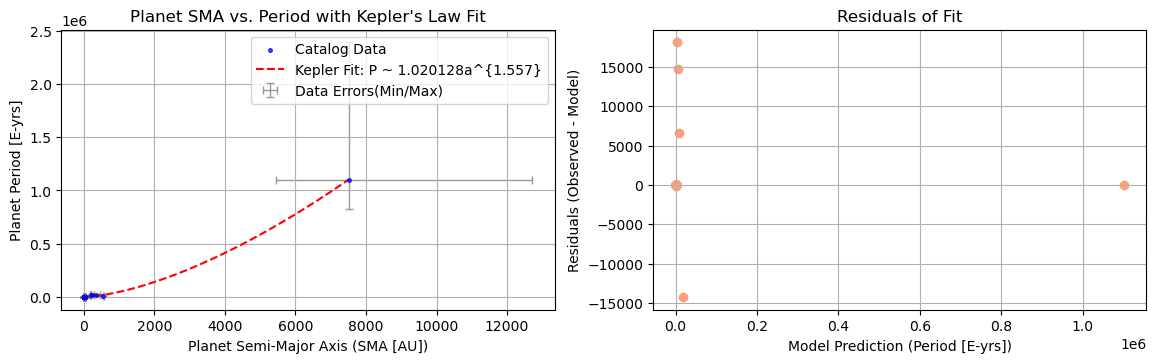

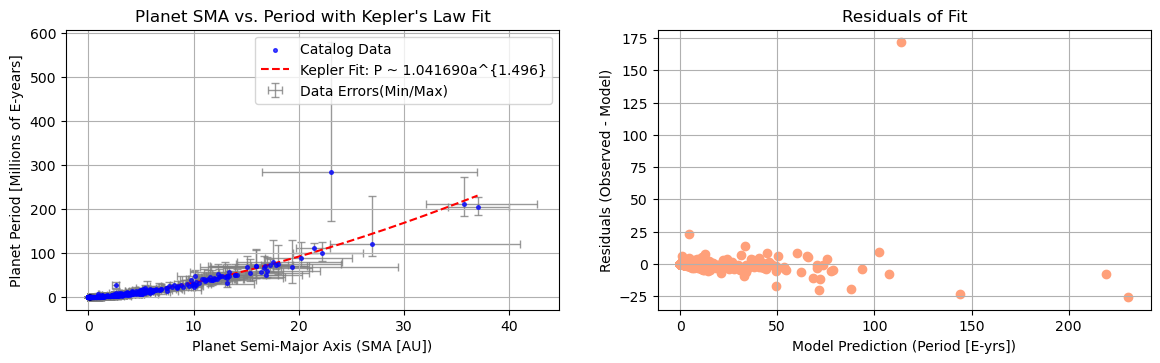

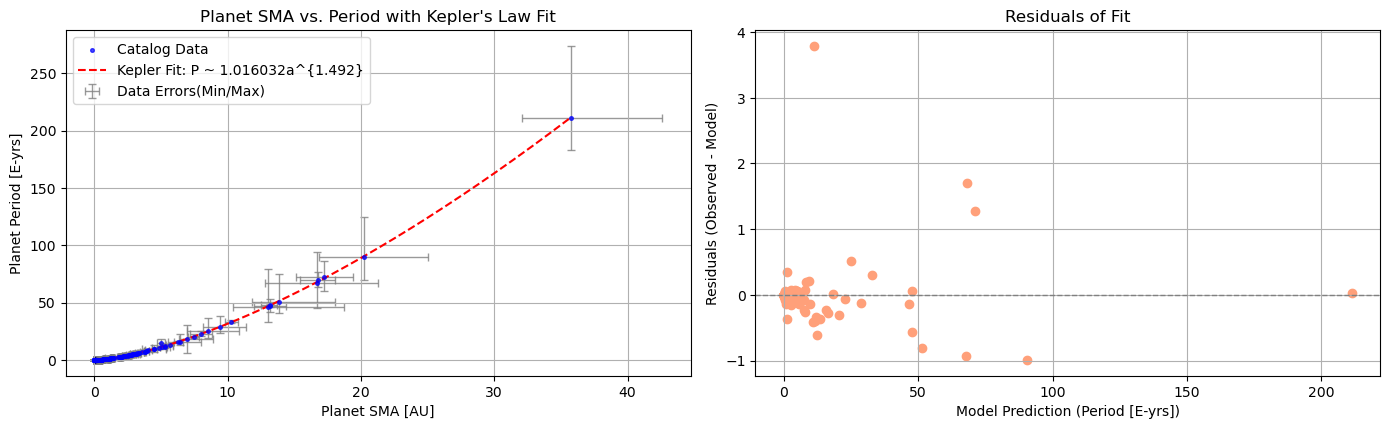

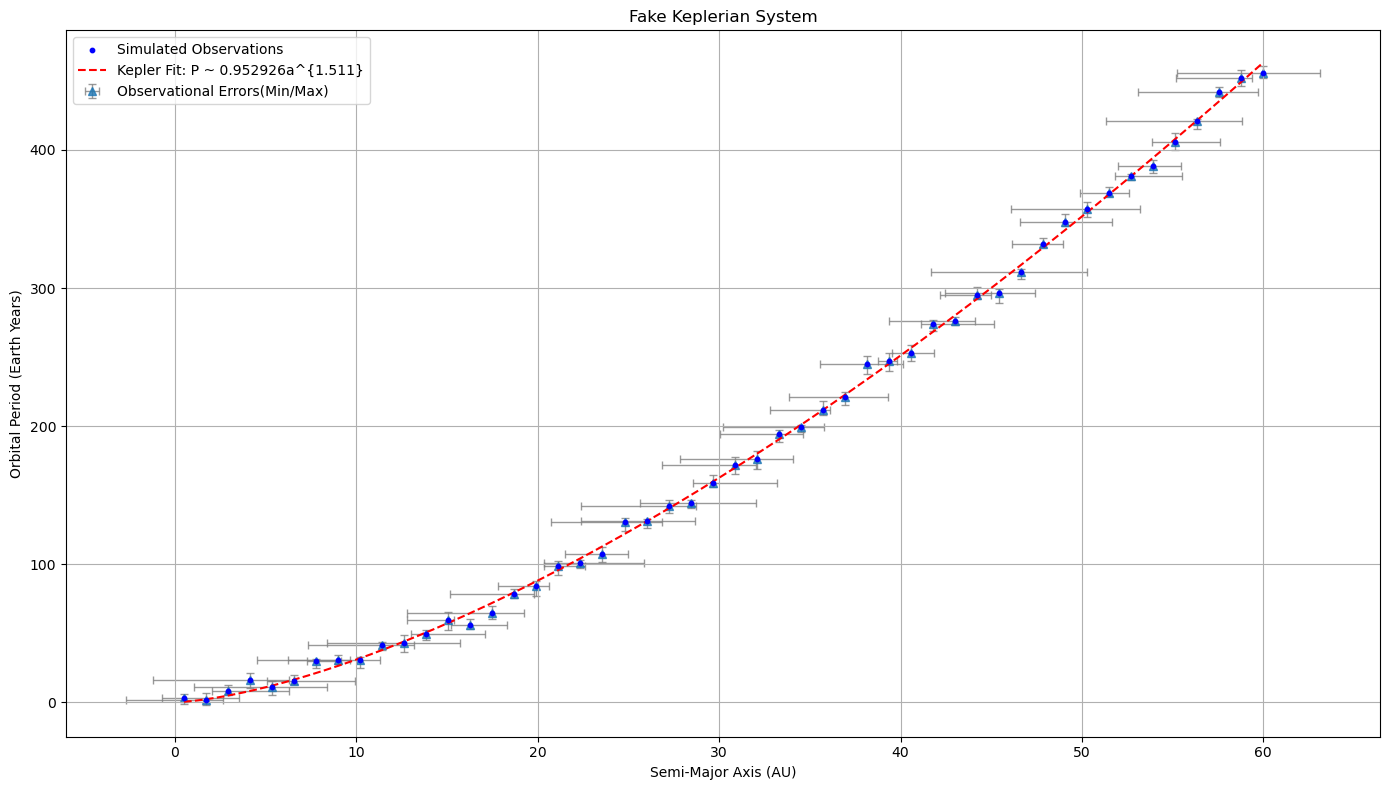

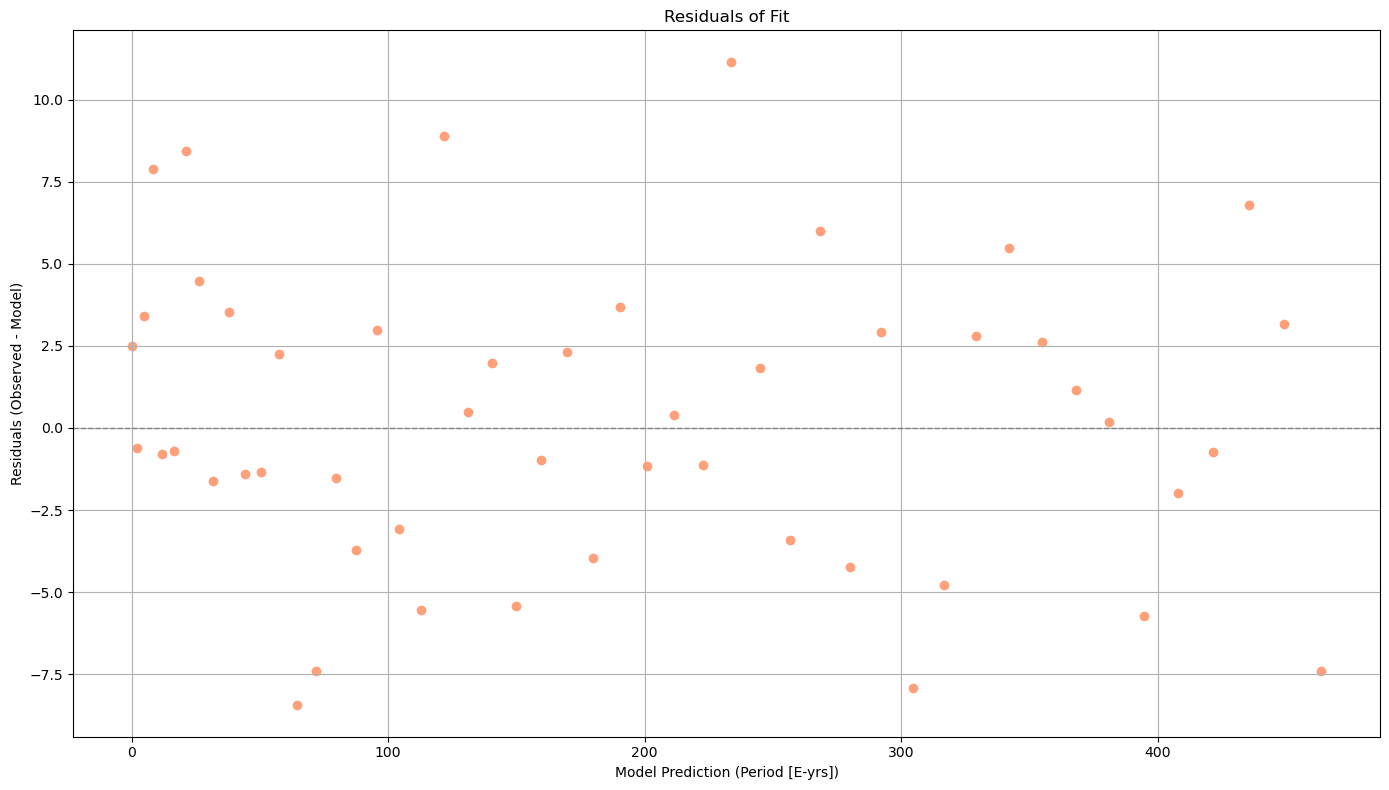

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.optimize as fit

# Read the CSV data
df = pd.read_csv('hwc.csv')

df['P_PERIOD'] = df['P_PERIOD'] / 365 #converts days to  earth years

# getting rid of the nan values
df = df.dropna(subset=['P_SEMI_MAJOR_AXIS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX']) 

#sort arrays for fitting
df_sorted = df.sort_values(by='P_SEMI_MAJOR_AXIS')
x_data = df_sorted['P_SEMI_MAJOR_AXIS']
x_err_min = df_sorted['P_SEMI_MAJOR_AXIS_ERROR_MIN']
x_err_max = df_sorted['P_SEMI_MAJOR_AXIS_ERROR_MAX']
y_data = df_sorted['P_PERIOD']
y_err_min = df_sorted['P_PERIOD_ERROR_MIN'] / 365
y_err_max = df_sorted['P_PERIOD_ERROR_MAX'] / 365

xerr = np.abs(np.array([x_err_min.values, x_err_max.values]))
yerr = np.abs(np.array([y_err_min.values, y_err_max.values]))


# kepler's law as a power law function 
def keps_law_period(x, a, b):
    return a*(x**b)
    
# fitting
params, covariance = fit.curve_fit(
    keps_law_period, 
    x_data, 
    y_data,  
    p0 = [2, 1.5]
)
# assign fitted parameters
a, b = params

# generate fitted values on the actual data 
y_model = keps_law_period(x_data, *params)
residuals = y_data - y_model

# generate smooth fit curve
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = keps_law_period(x_fit, *params)

# plotting
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
#raw data
plt.scatter(
    x_data, 
    y_data, 
    s = 7,
    label="Catalog Data", 
    color='blue', 
    alpha=0.7,
    zorder = 3,
)
#fit curve
plt.plot(
    x_fit, 
    y_fit, 
    color='red', 
    linestyle='--', 
    label=f'Kepler Fit: P ~ {a:.6f}a^{{{b:.3f}}}',
    zorder = 2
)
#errors
plt.errorbar(
    x_data, y_data,
    xerr = xerr,  # asymmetric x errors
    yerr = yerr,  # asymmetric y errors
    fmt= 'none',        # 'o' means circular markers
    ecolor='gray',  # color of error bars
    capsize=3,      # size of the error bar caps
    elinewidth=1,   # line width of the error bars
    alpha=0.8,      # transparency of the error bars
    label='Data Errors(Min/Max)',
    zorder = 1
)
plt.xlabel("Planet Semi-Major Axis (SMA [AU])")
plt.ylabel("Planet Period [E-yrs]")
plt.title("Planet SMA vs. Period with Kepler's Law Fit")
plt.legend()
plt.grid(True)

#residuals
plt.subplot(2,2,2)
plt.scatter(
    y_model, 
    residuals, 
    color = "lightsalmon"
)
plt.xlabel("Model Prediction (Period [E-yrs])")
plt.ylabel("Residuals (Observed - Model)")
plt.title("Residuals of Fit")
plt.grid(True)
plt.show()


#######################################################################################################################################
#######################################################################################################################################
#######################################################################################################################################
#######################################################################################################################################
#######################################################################################################################################
#######################################################################################################################################
#######################################################################################################################################
#######################################################################################################################################

#reduce data down to planets with less than 100 SMA [AU]
df2 = df[df['P_SEMI_MAJOR_AXIS'] < 100]

# getting rid of the nan values
df2 = df2.dropna(subset=['P_SEMI_MAJOR_AXIS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX']) 

#sort arrays for fitting
df2_sorted = df2.sort_values(by='P_SEMI_MAJOR_AXIS')
x2_data = df2_sorted['P_SEMI_MAJOR_AXIS']
x2_err_min = df2_sorted['P_SEMI_MAJOR_AXIS_ERROR_MIN']
x2_err_max = df2_sorted['P_SEMI_MAJOR_AXIS_ERROR_MAX']
y2_data = df2_sorted['P_PERIOD']
y2_err_min = df2_sorted['P_PERIOD_ERROR_MIN'] / 365
y2_err_max = df2_sorted['P_PERIOD_ERROR_MAX'] / 365

x2err = np.abs(np.array([x2_err_min.values, x2_err_max.values]))
y2err = np.abs(np.array([y2_err_min.values, y2_err_max.values]))


# kepler's law as a power law function 
def keps_law_period(x, a, b):
    return a*(x**b)

params2, covariance2 = fit.curve_fit(
    keps_law_period, 
    x2_data, 
    y2_data,  
    p0 = [2, 1.5]
)

a, b = params2

y2_model = keps_law_period(x2_data, *params2)
residuals2 = y2_data - y2_model

x_fit = np.linspace(x2_data.min(), x2_data.max(), 500)
y_fit = keps_law_period(x_fit, *params2)

plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
#filtered data
plt.scatter(
    x2_data, 
    y2_data, 
    s = 7,
    label="Catalog Data", 
    color='blue', 
    alpha=0.7,
    zorder = 3,
)
#fit curve
plt.plot(
    x_fit, 
    y_fit, 
    color='red', 
    linestyle='--', 
    label=f'Kepler Fit: P ~ {a:.6f}a^{{{b:.3f}}}',
    zorder = 2
)
#errors
plt.errorbar(
    x2_data, y2_data,
    xerr = x2err,  # asymmetric x errors
    yerr = y2err,  # asymmetric y errors
    fmt= 'none',        # 'o' means circular markers
    ecolor='gray',  # color of error bars
    capsize=3,      # size of the error bar caps
    elinewidth=1,   # line width of the error bars
    alpha=0.8,      # transparency of the error bars
    label='Data Errors(Min/Max)',
    zorder = 1
)
plt.xlabel("Planet Semi-Major Axis (SMA [AU])")
plt.ylabel("Planet Period [Millions of E-years]")
plt.title("Planet SMA vs. Period with Kepler's Law Fit")
plt.legend()
plt.grid(True)

#residuals
plt.subplot(2,2,2)
plt.scatter(
    y2_model, 
    residuals2, 
    color = "lightsalmon"
)
plt.xlabel("Model Prediction (Period [E-yrs])")
plt.ylabel("Residuals (Observed - Model)")
plt.title("Residuals of Fit")
plt.grid(True)
plt.show()


'''Looking at the graphs, we can see that with the residuals, the power law function doesn't quite fit the data I was using. This is because Kepler's Third Law requires 
that the host star must have a mass equal to that of our own sun--or one solar mass. So let's filter the data so tha the planets we are pulling from the data only orbit 
stars with a mass range close to one solar mass.'''


# clean (drop nan values) and restrict data further
df3 = df2[(df2['S_MASS'] >= 0.95) & (df2['S_MASS'] <= 1.05)]
df3 = df3.dropna(subset=['P_SEMI_MAJOR_AXIS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX'])

df3['P_PERIOD_ERROR_MIN'] = df3['P_PERIOD_ERROR_MIN'] / 365
df3['P_PERIOD_ERROR_MAX'] = df3['P_PERIOD_ERROR_MAX'] / 365


# sorting data
df3_sorted = df3.sort_values(by='P_SEMI_MAJOR_AXIS')
x3_data = df3_sorted['P_SEMI_MAJOR_AXIS'] #sorts SMA in ascending order 
x3_err_min = df3_sorted['P_SEMI_MAJOR_AXIS_ERROR_MIN']
x3_err_max = df3_sorted['P_SEMI_MAJOR_AXIS_ERROR_MAX']
y3_data = df3_sorted['P_PERIOD']
y3_err_min = df3_sorted['P_PERIOD_ERROR_MIN']
y3_err_max = df3_sorted['P_PERIOD_ERROR_MAX'] 

#convert errors to array with positive values
x3err = np.abs(np.array([x3_err_min.values, x3_err_max.values]))
y3err = np.abs(np.array([y3_err_min.values, y3_err_max.values]))

params3, covariance3 = fit.curve_fit(
    keps_law_period, 
    x3_data, 
    y3_data, 
    p0=[1, 1.5]
)

a, b = params3

y3_model = keps_law_period(x3_data, *params3)
residuals3 = y3_data - y3_model

x_fit = np.linspace(x3_data.min(), x3_data.max(), 500)
y_fit = keps_law_period(x_fit, *params3)

#even further filtered data
plt.figure(figsize = (14,8))
plt.subplot(2, 2, 1)
plt.scatter(
    x3_data, 
    y3_data, 
    s = 7,
    label="Catalog Data", 
    color='blue', 
    alpha=0.7,
    zorder = 3
)
#fit curve...again
plt.plot(
    x_fit, 
    y_fit, 
    color='red', 
    linestyle='--',
    label=f'Kepler Fit: P ~ {a:.6f}a^{{{b:.3f}}}',
    zorder =2
)
#errors
plt.errorbar(
    x3_data, y3_data,
    xerr = x3err,  # asymmetric x errors
    yerr = y3err,  # asymmetric y errors
    fmt= 'none',        # 'o' means circular markers
    ecolor='gray',  # color of error bars
    capsize=3,      # size of the error bar caps
    elinewidth=1,   # line width of the error bars
    alpha=0.8,      # transparency of the error bars
    label='Data Errors(Min/Max)',
    zorder = 1
)
plt.xlabel("Planet SMA [AU]")
plt.ylabel("Planet Period [E-yrs]")
plt.title("Planet SMA vs. Period with Kepler's Law Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()

# residuals
plt.subplot(2, 2, 2)
plt.scatter(
    y3_model, 
    residuals3, 
    color="lightsalmon"
)
plt.axhline(
    0, 
    color='gray', 
    linestyle='--', 
    linewidth=1)
plt.xlabel("Model Prediction (Period [E-yrs])")
plt.ylabel("Residuals (Observed - Model)")
plt.title("Residuals of Fit")
plt.grid(True)
plt.tight_layout()
plt.show()


######## MY OWN DATA ###############

# Set seed for reproducibility
np.random.seed(42)
SMA_vals = np.linspace(0.5, 60, 50)  # 100 evenly spaced SMA values

# parameters
a = 1.0  # scaling coefficient
n = 1.5  # Kepler's theoretical exponent


#get period values using orginal kepler's law
R = SMA_vals
P_true = a * R**n

#add noise to simulate observational error
noise = np.random.normal(loc=0.0, scale=5, size=P_true.shape)
P_obs = P_true + noise

# SMA errors
SMA_err_min = np.random.uniform(0.5, 5.4, size=SMA_vals.shape)
SMA_err_max = np.random.uniform(0.3, 3.7, size=SMA_vals.shape)
SMA_err = np.array([SMA_err_min, SMA_err_max]) 

# Period errors
period_err_min = np.random.uniform(2.3, 7.5, size=P_obs.shape)
period_err_max = np.random.uniform(1.2, 6.2, size=P_obs.shape)
period_err = np.array([period_err_min, period_err_max])

# fit fake data
params4, covariance4 = fit.curve_fit(
    keps_law_period, 
    SMA_vals, 
    P_obs, 
    p0=[1, 1.5]
)

a, b = params4

y4_model = keps_law_period(SMA_vals, *params4)
residuals4 = P_obs - y4_model

# Generate smooth fit curve for plotting
x_fit = np.linspace(SMA_vals.min(), SMA_vals.max(), 500)
y_fit = keps_law_period(x_fit, *params4)

#fake data
plt.figure(figsize = (14,8))
plt.scatter(
    SMA_vals, 
    P_obs,
    s = 10,
    label='Simulated Observations', 
    color='blue',
    zorder = 3
)
#fit for fake data
plt.plot(
    x_fit, 
    y_fit, 
    color='red', 
    linestyle='--',
    label=f'Kepler Fit: P ~ {a:.6f}a^{{{b:.3f}}}',
    zorder =2
)
#noise created (errors)
plt.errorbar(
    SMA_vals, P_obs,
    xerr = SMA_err,  # asymmetric x errors
    yerr = period_err,  # asymmetric y errors
    fmt= '^',        # 'o' means circular markers
    ecolor='gray',  # color of error bars
    capsize=3,      # size of the error bar caps
    elinewidth=1,   # line width of the error bars
    alpha=0.8,      # transparency of the error bars
    label='Observational Errors(Min/Max)',
    zorder = 1
)
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Orbital Period (Earth Years)')
plt.title('Fake Keplerian System')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#residuals
plt.figure(figsize = (14,8))
plt.scatter(
    y4_model, 
    residuals4, 
    color="lightsalmon"
)
plt.axhline(
    0, 
    color='gray', 
    linestyle='--', 
    linewidth=1)
plt.xlabel("Model Prediction (Period [E-yrs])")
plt.ylabel("Residuals (Observed - Model)")
plt.title("Residuals of Fit")
plt.grid(True)
plt.tight_layout()
plt.show()

